<a href="https://colab.research.google.com/github/nasare34/CMIP6-ANALYSIS-WITH-MLPREGRESSOR/blob/main/CMIP6_WORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate the years from 1990 to 2024
years = np.arange(1990, 2025)
num_years = len(years)

In [3]:
# Generate synthetic data
max_temperature = np.random.uniform(20, 40, num_years)  # Maximum temperature (°C)
min_temperature = np.random.uniform(5, 25, num_years)   # Minimum temperature (°C)
precipitation = np.random.uniform(50, 300, num_years)   # Precipitation (mm)
streamflow = np.random.uniform(100, 500, num_years)     # Streamflow (m^3/s)


In [4]:
# CMIP6 Scenario Data (Add a small variation to the base temperature and precipitation)
temp_ssp1_26 = max_temperature + np.random.uniform(-2, 2, num_years)
temp_ssp2_45 = max_temperature + np.random.uniform(-1, 3, num_years)
temp_ssp5_85 = max_temperature + np.random.uniform(0, 4, num_years)

pcp_ssp1_26 = precipitation + np.random.uniform(-20, 20, num_years)
pcp_ssp2_45 = precipitation + np.random.uniform(-10, 30, num_years)
pcp_ssp5_85 = precipitation + np.random.uniform(0, 40, num_years)

In [5]:
# Create a DataFrame
data = pd.DataFrame({
    'Year': years,
    'Max_Temperature': max_temperature,
    'Min_Temperature': min_temperature,
    'Precipitation': precipitation,
    'Streamflow': streamflow,
    'Temp_SSP1_2.6': temp_ssp1_26,
    'Temp_SSP2_4.5': temp_ssp2_45,
    'Temp_SSP5_8.5': temp_ssp5_85,
    'PCP_SSP1_2.6': pcp_ssp1_26,
    'PCP_SSP2_4.5': pcp_ssp2_45,
    'PCP_SSP5_8.5': pcp_ssp5_85
})

In [6]:
# Display the first few rows of the dataset
print(data.head())

   Year  Max_Temperature  Min_Temperature  Precipitation  Streamflow  \
0  1990        27.490802        21.167947     243.061192  199.716892   
1  1991        39.014286        11.092275      99.678920  264.153169   
2  1992        34.639879         6.953442      51.380529  402.220455   
3  1993        31.973170        18.684661     253.865357  191.519266   
4  1994        23.120373        13.803050     226.714336  130.791964   

   Temp_SSP1_2.6  Temp_SSP2_4.5  Temp_SSP5_8.5  PCP_SSP1_2.6  PCP_SSP2_4.5  \
0      29.340592      27.188268      29.685738    260.193935    268.661406   
1      38.021415      40.778037      41.781867     96.806286    103.198727   
2      34.628873      35.186820      37.247724     70.046722     56.403847   
3      31.176683      34.720090      32.870247    272.410156    247.624635   
4      22.259735      22.670457      25.969090    240.834714    239.845542   

   PCP_SSP5_8.5  
0    270.900161  
1    116.037038  
2     58.312302  
3    260.122839  
4    236

In [12]:
# Define features and target
features = ['Max_Temperature', 'Min_Temperature', 'Precipitation']
X = data[features]
y = data['Streamflow']  # Convert target to a 1D series

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Initialize and train the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)  # y_train is now a 1D series

# Predict and evaluate on the test set
y_pred = mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 13293.090446192899


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for MLP
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (100, 100, 100)],
    'max_iter': [500, 1000],
    'alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'learning_rate_init': [0.001, 0.01]
}

# Set up the GridSearchCV
mlp = MLPRegressor(random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its performance
best_mlp = grid_search.best_estimator_
y_pred_best = best_mlp.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Best Mean Squared Error: {mse_best}')
print(f'Best Parameters: {grid_search.best_params_}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Mean Squared Error: 17002.79108884159
Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'max_iter': 500}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')


Random Forest Mean Squared Error: 20351.746343591596


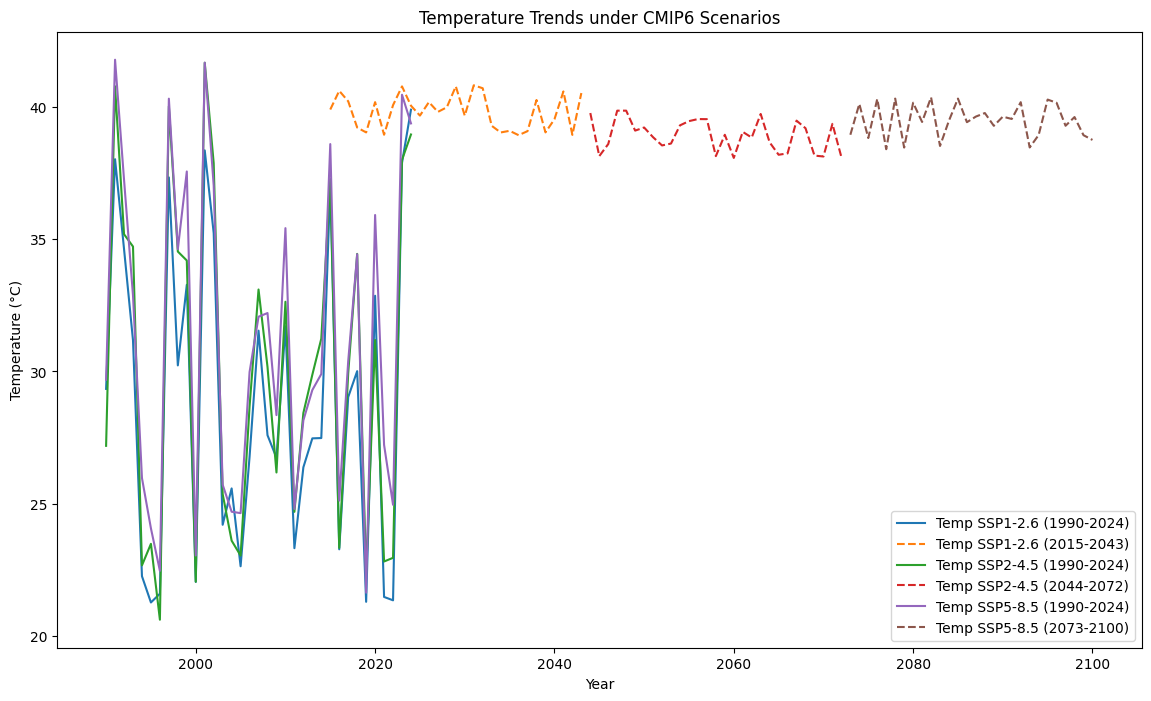

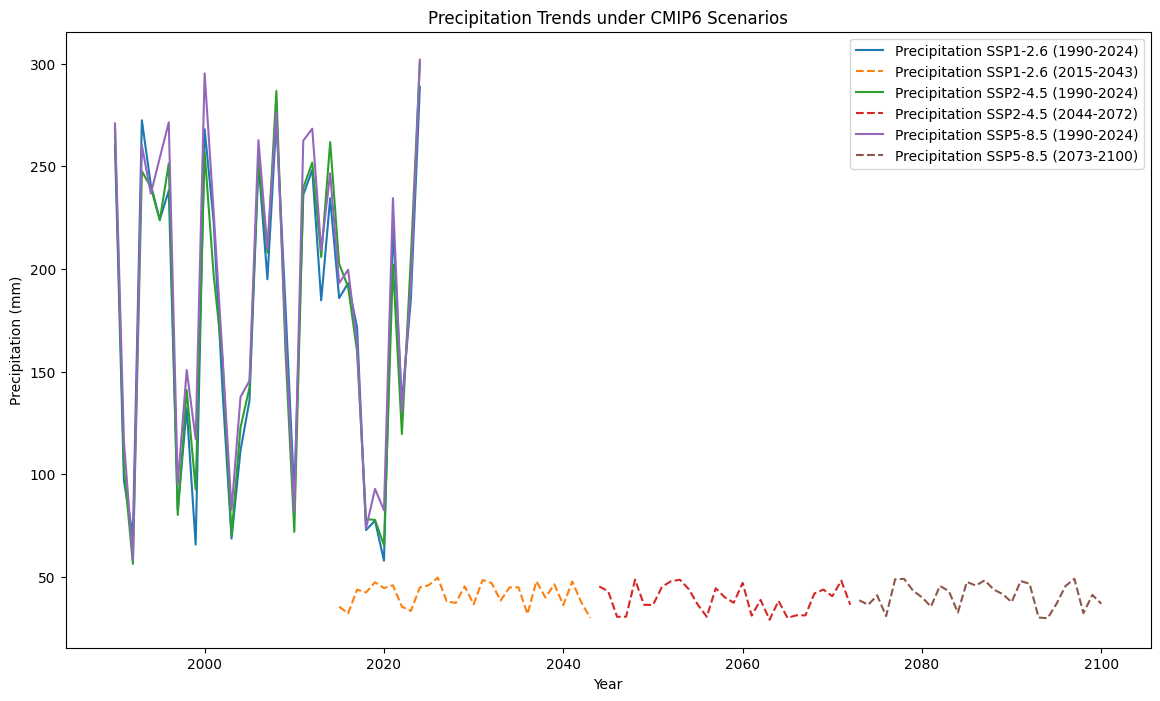

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume the dataset from earlier (1990-2024)
# We're using the same data generation method here

# For simplicity, let's use the dataset from 1990 to 2024 and simulate future periods

# Define future periods
near_future_years = np.arange(2015, 2044)
mid_far_future_years = np.arange(2044, 2073)
far_future_years = np.arange(2073, 2101)

# Simulate future data
def simulate_future_data(base_data, start_year, end_year):
    num_years = end_year - start_year + 1
    years = np.arange(start_year, end_year + 1)
    temp = base_data + np.random.uniform(-1, 1, num_years)
    pcp = base_data + np.random.uniform(-10, 10, num_years)
    return years, temp, pcp

# Simulating future data based on trends observed in the current dataset
years_near, temp_ssp1_26_near, pcp_ssp1_26_near = simulate_future_data(data['Temp_SSP1_2.6'].iloc[-1], 2015, 2043)
years_mid, temp_ssp2_45_mid, pcp_ssp2_45_mid = simulate_future_data(data['Temp_SSP2_4.5'].iloc[-1], 2044, 2072)
years_far, temp_ssp5_85_far, pcp_ssp5_85_far = simulate_future_data(data['Temp_SSP5_8.5'].iloc[-1], 2073, 2100)

# Plotting the temperature changes for different scenarios
plt.figure(figsize=(14, 8))

# Near future
plt.plot(data['Year'], data['Temp_SSP1_2.6'], label='Temp SSP1-2.6 (1990-2024)')
plt.plot(years_near, temp_ssp1_26_near, label='Temp SSP1-2.6 (2015-2043)', linestyle='--')

# Mid-far future
plt.plot(data['Year'], data['Temp_SSP2_4.5'], label='Temp SSP2-4.5 (1990-2024)')
plt.plot(years_mid, temp_ssp2_45_mid, label='Temp SSP2-4.5 (2044-2072)', linestyle='--')

# Far future
plt.plot(data['Year'], data['Temp_SSP5_8.5'], label='Temp SSP5-8.5 (1990-2024)')
plt.plot(years_far, temp_ssp5_85_far, label='Temp SSP5-8.5 (2073-2100)', linestyle='--')

plt.title('Temperature Trends under CMIP6 Scenarios')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Plotting the precipitation changes for different scenarios
plt.figure(figsize=(14, 8))

# Near future
plt.plot(data['Year'], data['PCP_SSP1_2.6'], label='Precipitation SSP1-2.6 (1990-2024)')
plt.plot(years_near, pcp_ssp1_26_near, label='Precipitation SSP1-2.6 (2015-2043)', linestyle='--')

# Mid-far future
plt.plot(data['Year'], data['PCP_SSP2_4.5'], label='Precipitation SSP2-4.5 (1990-2024)')
plt.plot(years_mid, pcp_ssp2_45_mid, label='Precipitation SSP2-4.5 (2044-2072)', linestyle='--')

# Far future
plt.plot(data['Year'], data['PCP_SSP5_8.5'], label='Precipitation SSP5-8.5 (1990-2024)')
plt.plot(years_far, pcp_ssp5_85_far, label='Precipitation SSP5-8.5 (2073-2100)', linestyle='--')

plt.title('Precipitation Trends under CMIP6 Scenarios')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


# NEW CODE

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [21]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate the years from 1990 to 2024
years = np.arange(1990, 2025)
num_years = len(years)

In [22]:
# Generate synthetic data
max_temperature = np.random.uniform(20, 40, num_years)  # Maximum temperature (°C)
min_temperature = np.random.uniform(5, 25, num_years)   # Minimum temperature (°C)
precipitation = np.random.uniform(50, 300, num_years)   # Precipitation (mm)
streamflow = np.random.uniform(100, 500, num_years)     # Streamflow (m^3/s)

# CMIP6 Scenario Data (Add a small variation to the base temperature and precipitation)
temp_ssp1_26 = max_temperature + np.random.uniform(-2, 2, num_years)
temp_ssp2_45 = max_temperature + np.random.uniform(-1, 3, num_years)
temp_ssp5_85 = max_temperature + np.random.uniform(0, 4, num_years)

pcp_ssp1_26 = precipitation + np.random.uniform(-20, 20, num_years)
pcp_ssp2_45 = precipitation + np.random.uniform(-10, 30, num_years)
pcp_ssp5_85 = precipitation + np.random.uniform(0, 40, num_years)

In [23]:
# Create a DataFrame
data = pd.DataFrame({
    'Year': years,
    'Max_Temperature': max_temperature,
    'Min_Temperature': min_temperature,
    'Precipitation': precipitation,
    'Streamflow': streamflow,
    'Temp_SSP1_2.6': temp_ssp1_26,
    'Temp_SSP2_4.5': temp_ssp2_45,
    'Temp_SSP5_8.5': temp_ssp5_85,
    'PCP_SSP1_2.6': pcp_ssp1_26,
    'PCP_SSP2_4.5': pcp_ssp2_45,
    'PCP_SSP5_8.5': pcp_ssp5_85
})

In [24]:
# Define features and target
features = ['Max_Temperature', 'Min_Temperature', 'Precipitation']
X = data[features]
y = data['Streamflow']

In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Initialize and train the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

In [27]:
# Predict and evaluate
y_pred = mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predict future streamflow using the scenarios
scenarios = ['SSP1_2.6', 'SSP2_4.5', 'SSP5_8.5']
future_predictions = {}

Mean Squared Error: 13293.090446192899


In [29]:
for scenario in scenarios:
    # Use Max_Temperature, Min_Temperature, and Precipitation for future prediction
    X_future = data[['Min_Temperature', f'Temp_{scenario}', f'PCP_{scenario}']].values
    # Scaling
    X_future_scaled = scaler.transform(X_future)
    # Predict
    future_pred = mlp.predict(X_future_scaled)
    future_predictions[scenario] = future_pred


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


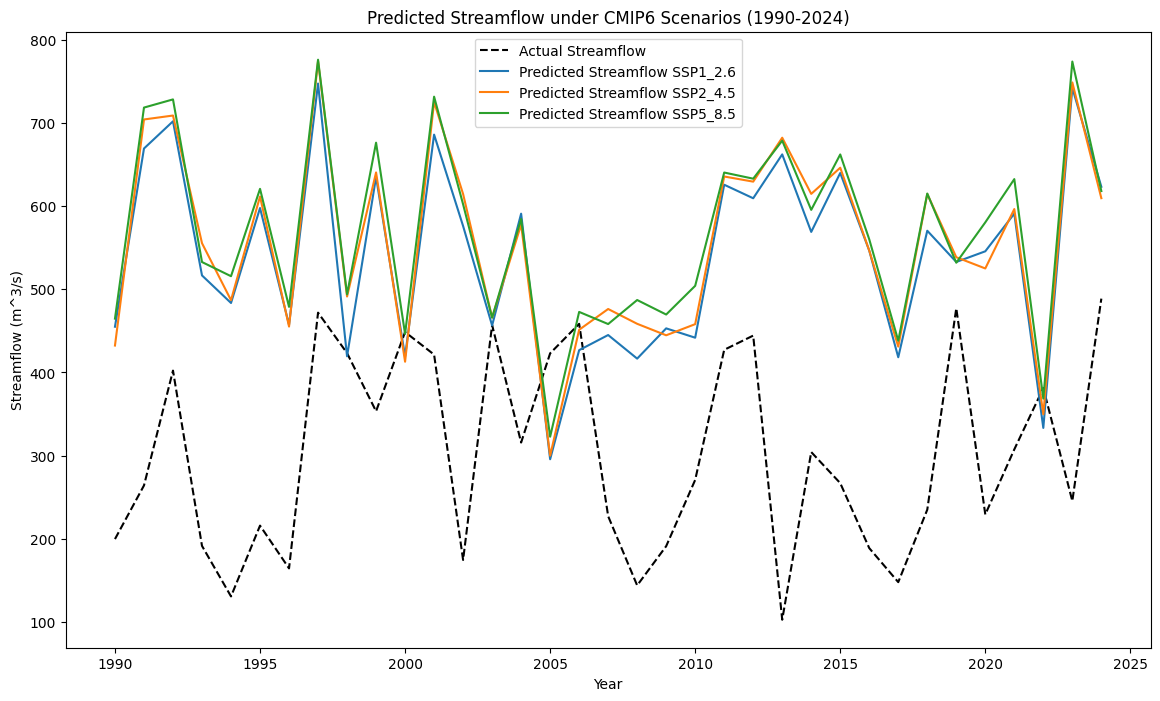

In [30]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(data['Year'], data['Streamflow'], label='Actual Streamflow', color='black', linestyle='--')

for scenario in scenarios:
    plt.plot(data['Year'], future_predictions[scenario], label=f'Predicted Streamflow {scenario}')

plt.title('Predicted Streamflow under CMIP6 Scenarios (1990-2024)')
plt.xlabel('Year')
plt.ylabel('Streamflow (m^3/s)')
plt.legend()
plt.show()

In [32]:
import matplotlib.pyplot as plt

# Define the function to simulate future data
def simulate_future_data(base_data, start_year, end_year):
    num_years = end_year - start_year + 1
    years = np.arange(start_year, end_year + 1)
    temp = base_data + np.random.uniform(-1, 1, num_years)
    pcp = base_data + np.random.uniform(-10, 10, num_years)
    return years, temp, pcp

In [33]:
# Simulating future data based on trends observed in the current dataset
years_near, temp_ssp1_26_near, pcp_ssp1_26_near = simulate_future_data(data['Temp_SSP1_2.6'].iloc[-1], 2015, 2043)
years_mid, temp_ssp2_45_mid, pcp_ssp2_45_mid = simulate_future_data(data['Temp_SSP2_4.5'].iloc[-1], 2044, 2072)
years_far, temp_ssp5_85_far, pcp_ssp5_85_far = simulate_future_data(data['Temp_SSP5_8.5'].iloc[-1], 2073, 2100)



<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

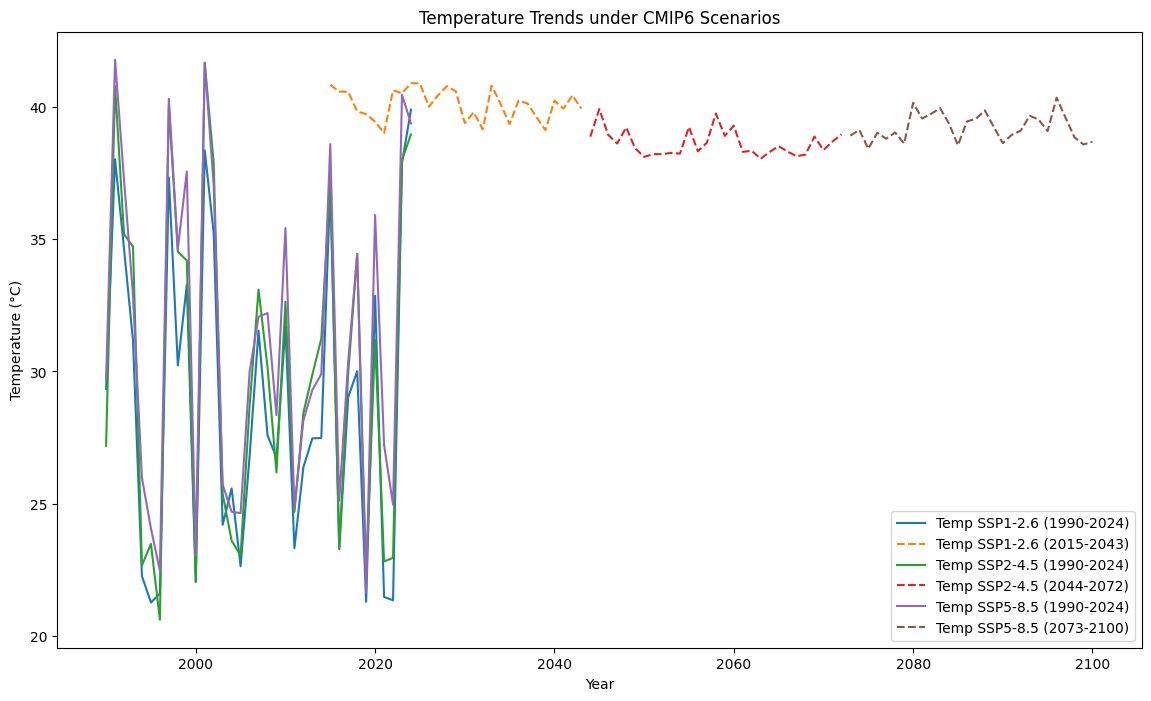

In [39]:
# Plotting the temperature changes for different scenarios
plt.figure(figsize=(14, 8))

# Near future
plt.plot(data['Year'], data['Temp_SSP1_2.6'], label='Temp SSP1-2.6 (1990-2024)')
plt.plot(years_near, temp_ssp1_26_near, label='Temp SSP1-2.6 (2015-2043)', linestyle='--')

# Mid-far future
plt.plot(data['Year'], data['Temp_SSP2_4.5'], label='Temp SSP2-4.5 (1990-2024)')
plt.plot(years_mid, temp_ssp2_45_mid, label='Temp SSP2-4.5 (2044-2072)', linestyle='--')

# Far future
plt.plot(data['Year'], data['Temp_SSP5_8.5'], label='Temp SSP5-8.5 (1990-2024)')
plt.plot(years_far, temp_ssp5_85_far, label='Temp SSP5-8.5 (2073-2100)', linestyle='--')

plt.title('Temperature Trends under CMIP6 Scenarios')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()  # Ensure this is included to render the plot

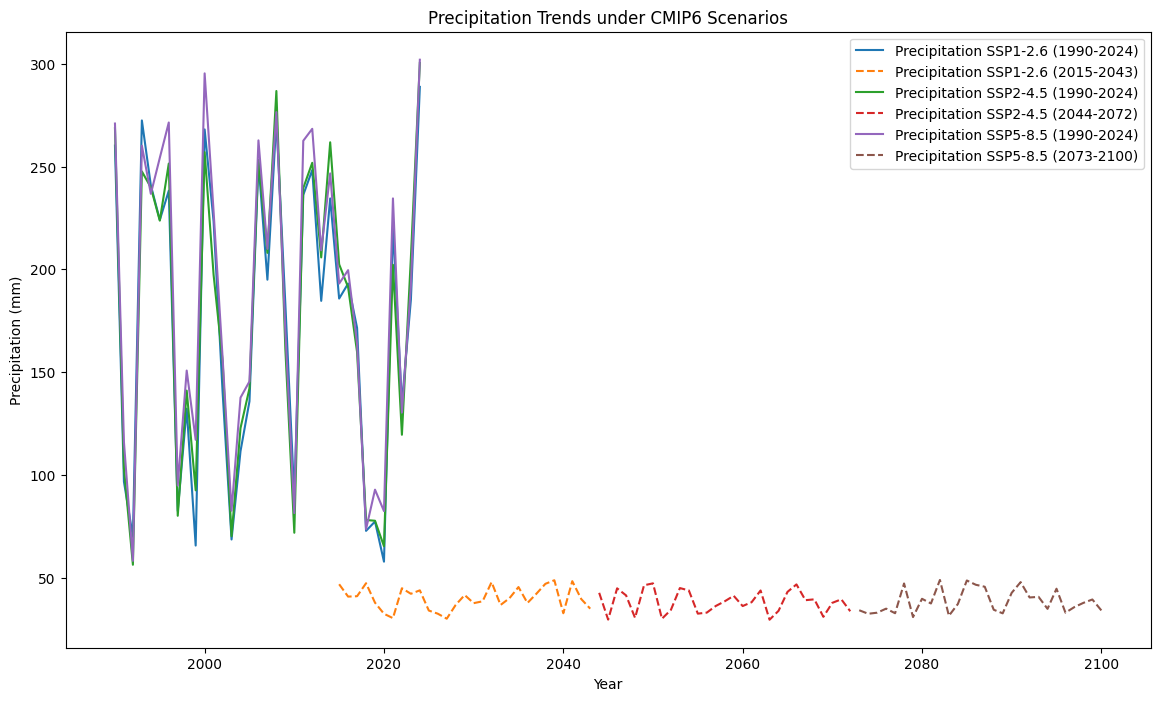

In [38]:
# Plotting the precipitation changes for different scenarios
plt.figure(figsize=(14, 8))

# Near future
plt.plot(data['Year'], data['PCP_SSP1_2.6'], label='Precipitation SSP1-2.6 (1990-2024)')
plt.plot(years_near, pcp_ssp1_26_near, label='Precipitation SSP1-2.6 (2015-2043)', linestyle='--')

# Mid-far future
plt.plot(data['Year'], data['PCP_SSP2_4.5'], label='Precipitation SSP2-4.5 (1990-2024)')
plt.plot(years_mid, pcp_ssp2_45_mid, label='Precipitation SSP2-4.5 (2044-2072)', linestyle='--')

# Far future
plt.plot(data['Year'], data['PCP_SSP5_8.5'], label='Precipitation SSP5-8.5 (1990-2024)')
plt.plot(years_far, pcp_ssp5_85_far, label='Precipitation SSP5-8.5 (2073-2100)', linestyle='--')

plt.title('Precipitation Trends under CMIP6 Scenarios')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()  # Ensure this is included to render the plot